# EDA

In [66]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [67]:
!pip install imblearn

In [68]:
!pip install wordcloud

In [69]:
!pip install textblob

In [70]:
!pip install nltk textblob

In [71]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
file_path = 'renttherunway_final_data.json'
data = pd.read_json(file_path, lines=True)

### Dataset Description
This dataset contains information about clothing rentals, with attributes that describe both the clothing and the users who rent them.

#### **User Information**:
- **user_id**: Unique identifier for the user
- **age**: Age of the user
- **height**: Height of the user
- **weight**: Weight of the user
- **bust size**: Size of the user's bust
- **body type**: Body shape (e.g., hourglass, pear, etc.)

#### **Item Information**:
- **item_id**: Unique identifier for the item
- **category**: Category of the item (e.g., romper, gown, dress, etc.)
- **size**: Size of the item rented
- **rating**: Rating given to the item (out of 10)
- **fit**: The fit status of the item (e.g., "fit" or "not fit")
- **rented for**: Reason for renting the item (e.g., vacation, wedding, formal affair)
- **review_text**: Review of the item
- **review_summary**: Summary of the review
- **review_date**: Date of the review

In [73]:
# checking data types
data.dtypes

fit                object
user_id             int64
bust size          object
item_id             int64
weight             object
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height             object
size                int64
age               float64
review_date        object
dtype: object

In [74]:
# looking at statistics for basic numerical features
data.describe

<bound method NDFrame.describe of         fit  user_id bust size  item_id  weight  rating     rented for  \
0       fit   420272       34d  2260466  137lbs    10.0       vacation   
1       fit   273551       34b   153475  132lbs    10.0          other   
2       fit   360448       NaN  1063761     NaN    10.0          party   
3       fit   909926       34c   126335  135lbs     8.0  formal affair   
4       fit   151944       34b   616682  145lbs    10.0        wedding   
...     ...      ...       ...      ...     ...     ...            ...   
192539  fit    66386      34dd  2252812  140lbs    10.0           work   
192540  fit   118398       32c   682043  100lbs    10.0           work   
192541  fit    47002       36a   683251  135lbs     6.0       everyday   
192542  fit   961120       36c   126335  165lbs    10.0        wedding   
192543  fit   123612       36b   127865  155lbs    10.0        wedding   

                                              review_text          body type 

In [75]:
# unique values in categorical columns
data['body type'].value_counts(), data['category'].value_counts(), data['fit'].value_counts()

(body type
 hourglass            55349
 athletic             43667
 pear                 22135
 petite               22131
 full bust            15006
 straight & narrow    14742
 apple                 4877
 Name: count, dtype: int64,
 category
 dress         92884
 gown          44381
 sheath        19316
 shift          5365
 jumpsuit       5184
               ...  
 caftan            4
 overcoat          2
 sweatpants        2
 crewneck          1
 buttondown        1
 Name: count, Length: 68, dtype: int64,
 fit
 fit      142058
 small     25779
 large     24707
 Name: count, dtype: int64)

In [76]:
# Calculate counts and percentages
fit_counts = data['fit'].value_counts()
fit_percentage = data['fit'].value_counts(normalize=True) * 100
fit_percentage = fit_percentage[['fit', 'small', 'large']]

# Combine counts and percentages into a DataFrame
fit_table = pd.DataFrame({
    "Fit Type": fit_counts.index,
    "Count": fit_counts.values,
    "Percentage": fit_percentage.values
})

# Format percentages as integers with %
fit_table['Percentage'] = fit_table['Percentage'].round(1).astype(str) + "%"

print(fit_table.to_string(index=False))

Fit Type  Count Percentage
     fit 142058      73.8%
   small  25779      13.4%
   large  24707      12.8%


### This EDA visualizes the relationship between body type and fit categories using a stacked bar chart. It shows the distribution of fit, small, and large for each body type, helping identify patterns in how fit varies across body types.

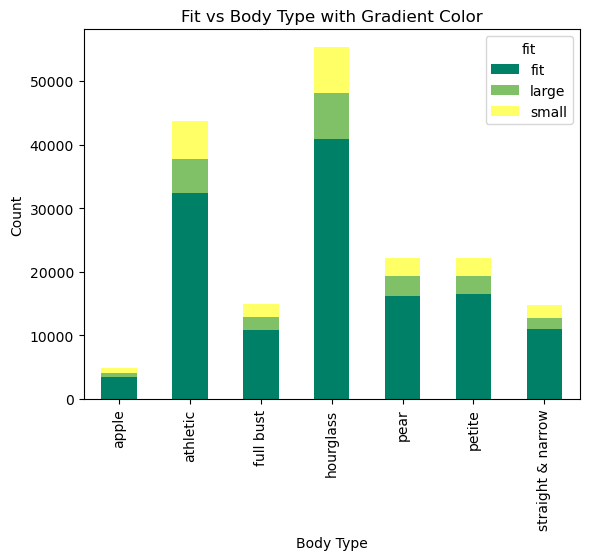

In [77]:
# body types and fit correlation
fit_by_body_type = data.groupby('body type')['fit'].value_counts().unstack()
colormap = plt.cm.summer
ax = fit_by_body_type.plot(kind='bar', stacked=True, colormap=colormap)
plt.title('Fit vs Body Type with Gradient Color')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.show()

### This EDA visualizes the most popular clothing categories based on the number of rentals. It uses a horizontal bar chart to show categories with more than 500 rentals, highlighting which items are rented most frequently.

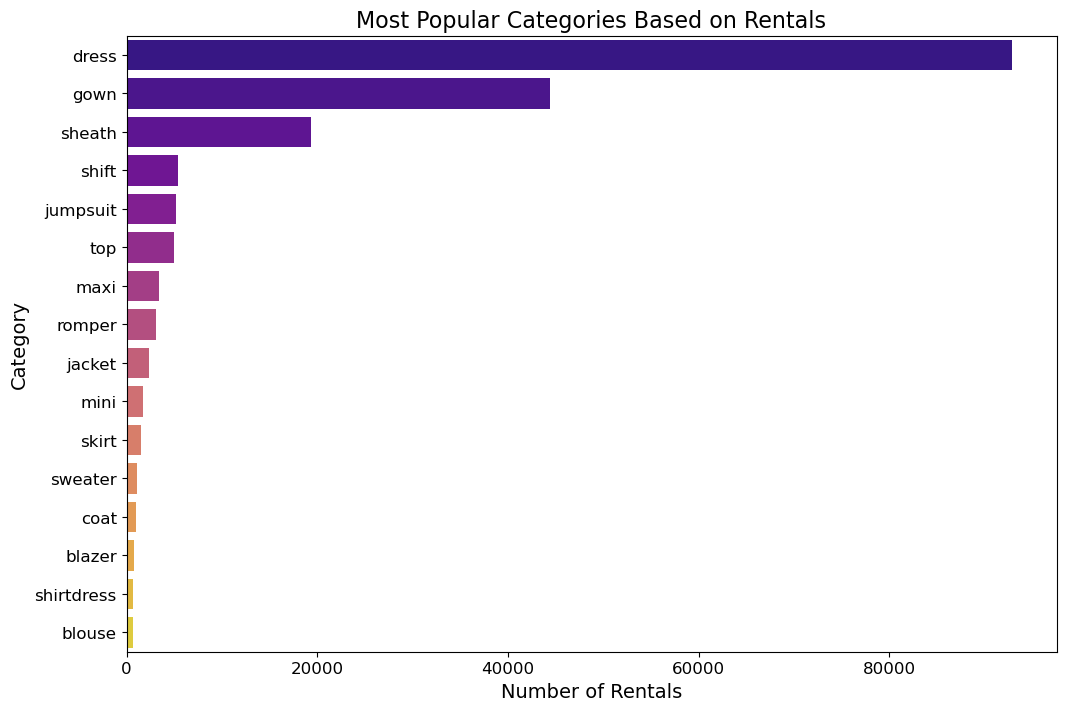

In [78]:
# popular categories based on number of rentals
rental_counts = data["category"].value_counts()
rental_counts = rental_counts[rental_counts > 500]

plt.figure(figsize=(12, 8))
sns.barplot(x=rental_counts.values, y=rental_counts.index, palette="plasma")
plt.title("Most Popular Categories Based on Rentals", fontsize=16)
plt.xlabel("Number of Rentals", fontsize=14)
plt.ylabel("Category", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### This EDA visualizes the distribution of body types in the dataset, using a bar chart to show the frequency of each body type. It highlights the most common body types, providing insight into the variety of body types represented in the data.

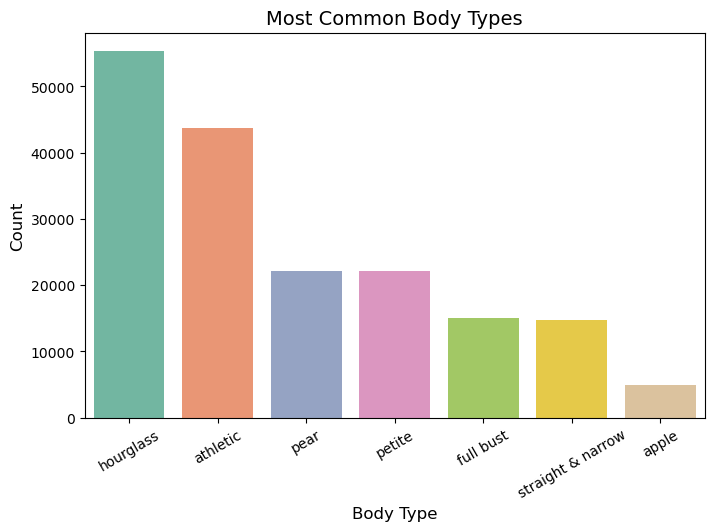

In [79]:
# common body types
body_type_counts = data['body type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=body_type_counts.index, y=body_type_counts.values, palette="Set2")
plt.title("Most Common Body Types", fontsize=14)
plt.xlabel("Body Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### This EDA visualizes the relationship between height and rented size using a scatter plot, showing how the height of individuals correlates with the sizes they rent. It helps identify any trends or patterns in sizing preferences based on height.

                       weight  height_inches
body type                                   
apple              157.222473      64.944821
full bust          148.572782      65.130922
pear               144.627623      65.577128
hourglass          143.774148      65.446737
athletic           135.854104      65.931618
straight & narrow  125.624741      66.823778
petite             116.552018      62.376526


<Figure size 1000x500 with 0 Axes>

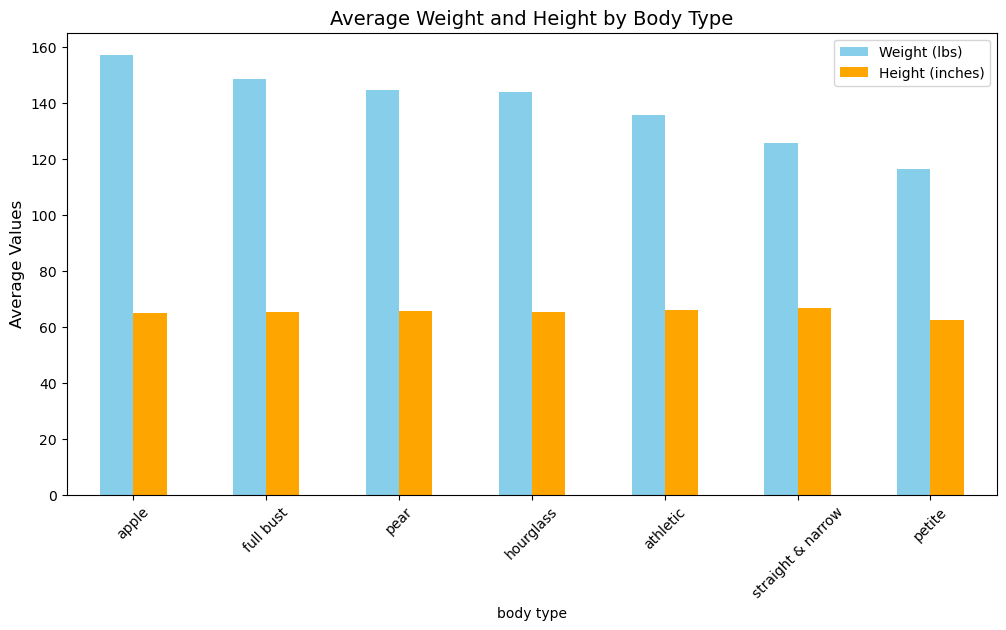

In [80]:
import numpy as np
file_path = 'renttherunway_final_data.json'
data = pd.read_json(file_path, lines=True)

data['weight'] = data['weight'].str.replace('lbs', '').astype(float)
data = data.dropna(subset=['weight'])
height_parsed = data['height'].str.extract(r'(\d+)\'\s*(\d+)\"')
height_parsed = height_parsed.dropna().astype(int)
data['height_inches'] = (height_parsed[0] * 12) + height_parsed[1]
data = data.dropna(subset=['height_inches'])
data = data.dropna(subset=['body type'])
summary = data.groupby('body type')[['weight', 'height_inches']].mean().sort_values(by='weight', ascending=False)

print(summary)

plt.figure(figsize=(10, 5))
summary.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Average Weight and Height by Body Type', fontsize=14)
plt.ylabel('Average Values', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(['Weight (lbs)', 'Height (inches)'])
plt.show()

# Recommender 

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
file_path = 'renttherunway_final_data.json'
data = pd.read_json(file_path, lines=True)

In [83]:
# import pandas as pd
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.preprocessing import StandardScaler, LabelEncoder

# file_path = 'renttherunway_final_data.json'  # Replace with your file path
# data = pd.read_json(file_path, lines=True)

# data_cleaned = data.dropna(subset=['height', 'weight', 'body type', 'rented for', 'size'])

# # preprocessing data
# def convert_height_to_inches(height):
#     if isinstance(height, str) and "'" in height:
#         feet, inches = height.split("'")
#         return int(feet) * 12 + int(inches.replace('"', ''))
#     return None

# data_cleaned['height'] = data_cleaned['height'].apply(convert_height_to_inches)
# data_cleaned['weight'] = data_cleaned['weight'].str.replace('lbs', '').astype(float)

# le_body_type = LabelEncoder()
# data_cleaned['body_type_encoded'] = le_body_type.fit_transform(data_cleaned['body type'].astype(str))

# le_rented_for = LabelEncoder()
# data_cleaned['rented_for_encoded'] = le_rented_for.fit_transform(data_cleaned['rented for'].astype(str))

# # print("Body Type Encoding Mapping:")
# # print(dict(zip(le_body_type.classes_, range(len(le_body_type.classes_)))))
# # print("\nRented For Encoding Mapping:")
# # print(dict(zip(le_rented_for.classes_, range(len(le_rented_for.classes_)))))

# # normalize numerical features
# scaler = StandardScaler()
# data_cleaned[['height', 'weight']] = scaler.fit_transform(data_cleaned[['height', 'weight']])

# # define features
# features = ['height', 'weight', 'body_type_encoded', 'rented_for_encoded']
# X_cleaned = data_cleaned[features]

# # user profile
# user_profile = [59, 140, 3, 4]  # example: height=60 inches, weight=130 lbs, body_type=3 (hourglass), rented_for=4 (party)

# user_profile_scaled = scaler.transform([user_profile[:2]])[0].tolist() + user_profile[2:]

# def find_similar_users(user_profile, X):
#     user_profile_df = pd.DataFrame([user_profile], columns=X.columns)
#     similarity_scores = cosine_similarity(user_profile_df, X)
#     similarity_scores = similarity_scores.flatten()
#     similar_users_indices = similarity_scores.argsort()[-5:][::-1]
#     return similar_users_indices, similarity_scores

# similar_users_indices, similarity_scores = find_similar_users(user_profile_scaled, X_cleaned)

# print("Most similar users' rented items and statistics:")
# for idx in similar_users_indices:
#     user = data_cleaned.iloc[idx]
#     print(f"User {user['user_id']} rented item {user['item_id']} with similarity score {similarity_scores[idx]:.4f}")
#     print(f"    Standardized Height: {user['height']} inches")
#     print(f"    Original Height: {user['height'] * scaler.scale_[0] + scaler.mean_[0]:.2f} inches")
#     print(f"    Standardized Weight: {user['weight']} lbs")
#     print(f"    Original Weight: {user['weight'] * scaler.scale_[1] + scaler.mean_[1]:.2f} lbs")
#     print(f"    Body Type: {user['body type']}")
#     print(f"    Rented For: {user['rented for']}")
#     print("-" * 50)  # Separator for readability

In [84]:
# def recommend_items(user_profile, X, data):
#     similar_users_indices, similarity_scores = find_similar_users(user_profile, X)
    
#     recommended_items = []
#     for idx in similar_users_indices:
#         item_id = data.iloc[idx]['item_id']
#         if item_id not in recommended_items:
#             recommended_items.append(item_id)
    
#     return recommended_items

# # Step 6: Get item recommendations for the input user profile
# recommended_items = recommend_items(user_profile_scaled, X_cleaned, data_cleaned)
# print("Recommended items:", recommended_items)

In [103]:
#NEW CODE

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder
import random

file_path = 'renttherunway_final_data.json'  # Replace with your file path
data = pd.read_json(file_path, lines=True)

# Drop rows with missing values
data_cleaned = data.dropna(subset=['height', 'weight', 'body type', 'rented for', 'size'])

# Preprocessing data
def convert_height_to_inches(height):
    if isinstance(height, str) and "'" in height:
        feet, inches = height.split("'")
        return int(feet) * 12 + int(inches.replace('"', ''))
    return None

data_cleaned['height'] = data_cleaned['height'].apply(convert_height_to_inches)
data_cleaned['weight'] = data_cleaned['weight'].str.replace('lbs', '').astype(float)

# Encode categorical features
le_body_type = LabelEncoder()
data_cleaned['body_type_encoded'] = le_body_type.fit_transform(data_cleaned['body type'].astype(str))

le_rented_for = LabelEncoder()
data_cleaned['rented_for_encoded'] = le_rented_for.fit_transform(data_cleaned['rented for'].astype(str))

# Normalize numerical features
scaler = StandardScaler()
data_cleaned[['height', 'weight']] = scaler.fit_transform(data_cleaned[['height', 'weight']])

# Define features
features = ['height', 'weight', 'body_type_encoded', 'rented_for_encoded']
X_cleaned = data_cleaned[features]

# Reset indices for X_cleaned and data_cleaned
data_cleaned = data_cleaned.reset_index(drop=True)
X_cleaned = X_cleaned.reset_index(drop=True)

# Print the mappings of encoded 'rented_for' and 'body_type'
print("Encoded 'Rented For' Mapping:")
for original, encoded in zip(le_rented_for.classes_, range(len(le_rented_for.classes_))):
    print(f"Original: {original} -> Encoded: {encoded}")

print("\nEncoded 'Body Type' Mapping:")
for original, encoded in zip(le_body_type.classes_, range(len(le_body_type.classes_))):
    print(f"Original: {original} -> Encoded: {encoded}")

# User profile (example: height=59 inches, weight=140 lbs, body_type=3 (hourglass), rented_for=4 (party))
user_profile = [60, 160, 5, 5]  # Modify this as per user input

user_profile_scaled = scaler.transform([user_profile[:2]])[0].tolist() + user_profile[2:]

# Function to find similar users
def find_similar_users(user_profile, X):
    user_profile_df = pd.DataFrame([user_profile], columns=X.columns)
    similarity_scores = cosine_similarity(user_profile_df, X)
    similarity_scores = similarity_scores.flatten()
    similar_users_indices = similarity_scores.argsort()[-10:][::-1]
    return similar_users_indices, similarity_scores

similar_users_indices, similarity_scores = find_similar_users(user_profile_scaled, X_cleaned)

# Print the rented items and details of the most similar users
print("Most similar users' rented items and statistics:")
for idx in similar_users_indices:
    user = data_cleaned.iloc[idx]  # Use the reset index from data_cleaned
    print(f"User {user['user_id']} rented item {user['item_id']} with similarity score {similarity_scores[idx]:.4f}")
    print(f"    Standardized Height: {user['height']} inches")
    print(f"    Original Height: {user['height'] * scaler.scale_[0] + scaler.mean_[0]:.2f} inches")
    print(f"    Standardized Weight: {user['weight']} lbs")
    print(f"    Original Weight: {user['weight'] * scaler.scale_[1] + scaler.mean_[1]:.2f} lbs")
    print(f"    Body Type: {user['body type']}")
    print(f"    Rented For: {user['rented for']}")
    print("-" * 50)  # Separator for readability

# Step 1: Get all recommended users and their rented items filtered by rented_for_encoded
def get_filtered_rentals_for_users(similar_users_indices, data_cleaned):
    all_rented_items_filtered = set()  # Set to remove duplicates

    for idx in similar_users_indices:
        user = data_cleaned.iloc[idx]
        rented_for_encoded = user['rented_for_encoded']  # Get the 'rented_for_encoded' for the user
        
        # Get the rented items for this user and filter by rented_for_encoded
        user_rented_items = data_cleaned[data_cleaned['user_id'] == user['user_id']]
        filtered_rentals = user_rented_items[user_rented_items['rented_for_encoded'] == rented_for_encoded]
        
        # Add the item ids to the set (removes duplicates)
        all_rented_items_filtered.update(filtered_rentals['item_id'])

    return all_rented_items_filtered

filtered_rentals = get_filtered_rentals_for_users(similar_users_indices, data_cleaned)

# Step 2: Get the recommended items
def recommend_items(user_profile, X, data):
    similar_users_indices, similarity_scores = find_similar_users(user_profile, X)
    
    recommended_items = []
    for idx in similar_users_indices:
        item_id = data.iloc[idx]['item_id']
        if item_id not in recommended_items:
            recommended_items.append(item_id)
    
    return recommended_items

recommended_items = recommend_items(user_profile_scaled, X_cleaned, data_cleaned)

# Step 3: Compare recommendations to the filtered past rentals list
recommended_set = set(recommended_items)
true_rentals_set = filtered_rentals

# True positives: items that are both in the recommended list and the past rentals list
true_positives = recommended_set.intersection(true_rentals_set)

# Precision
precision = len(true_positives) / len(recommended_set) if len(recommended_set) > 0 else 0.0

# Recall
recall = len(true_positives) / len(true_rentals_set) if len(true_rentals_set) > 0 else 0.0

# Print the metrics
print(f"Filtered Rentals (Based on Rented For Encoded) for Recommended Users: {filtered_rentals}")
print(f"Recommended Items: {recommended_items}")
print(f"True Positives: {true_positives}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

/var/folders/00/dfc6l5fn61s09z4jy0lqyz_w0000gn/T/ipykernel_42982/1776531038.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['height'] = data_cleaned['height'].apply(convert_height_to_inches)
/var/folders/00/dfc6l5fn61s09z4jy0lqyz_w0000gn/T/ipykernel_42982/1776531038.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['weight'] = data_cleaned['weight'].str.replace('lbs', '').astype(float)
/var/folders/00/dfc6l5fn61s09z4jy0lqyz_w0000gn/T/ipykernel_42982/1776531038.py:26: Settin

Encoded 'Rented For' Mapping:
Original: date -> Encoded: 0
Original: everyday -> Encoded: 1
Original: formal affair -> Encoded: 2
Original: other -> Encoded: 3
Original: party -> Encoded: 4
Original: party: cocktail -> Encoded: 5
Original: vacation -> Encoded: 6
Original: wedding -> Encoded: 7
Original: work -> Encoded: 8

Encoded 'Body Type' Mapping:
Original: apple -> Encoded: 0
Original: athletic -> Encoded: 1
Original: full bust -> Encoded: 2
Original: hourglass -> Encoded: 3
Original: pear -> Encoded: 4
Original: petite -> Encoded: 5
Original: straight & narrow -> Encoded: 6
Most similar users' rented items and statistics:
User 189062 rented item 335248 with similarity score 1.0000
    Standardized Height: -1.6036502722315407 inches
    Original Height: 61.00 inches
    Standardized Weight: 0.805036026703655 lbs
    Original Weight: 155.00 lbs
    Body Type: pear
    Rented For: party
--------------------------------------------------
User 525319 rented item 658625 with similarity

In [93]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Collect Actual Scores and Predicted Scores
actual_scores = []
predicted_scores = []

# Get the similarity score for each true positive
for item_id in true_positives:
    for idx in similar_users_indices:
        user = data_cleaned.iloc[idx]
        if user['item_id'] == item_id:
            actual_scores.append(similarity_scores[idx])
            break

# Get the similarity score for each recommended item
for item_id in recommended_items:
    for idx in similar_users_indices:
        user = data_cleaned.iloc[idx]
        if user['item_id'] == item_id:
            predicted_scores.append(similarity_scores[idx])
            break

# Step 2: Calculate MSE and RMSE
if len(actual_scores) > 0 and len(predicted_scores) > 0:
    mse = mean_squared_error(actual_scores, predicted_scores)
    rmse = np.sqrt(mse)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
else:
    print("Insufficient data to calculate MSE/RMSE.")

Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0037


In [94]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42)

In [95]:
# Creating a dictionary of user_id to their rented items in the test set
test_user_items = test_data.groupby('user_id')['item_id'].apply(list).to_dict()

# Simulate hidden items by randomly removing one item per user
hidden_items = {}
for user_id, items in test_user_items.items():
    if len(items) > 1:
        hidden_items[user_id] = items.pop(random.randint(0, len(items) - 1))

In [99]:
def recommend_items(user_profile, X, data):
    similar_users_indices, similarity_scores = find_similar_users(user_profile, X)
    
    recommended_items = []
    for idx in similar_users_indices:
        # Ensure idx is within the valid range
        if idx < len(data):  # Check if the index is within bounds
            item_id = data.iloc[idx]['item_id']
            if item_id not in recommended_items:
                recommended_items.append(item_id)
        else:
            print(f"Index {idx} is out of bounds for the data DataFrame!")
    
    return recommended_items

def evaluate_recommendations(test_data, hidden_items, train_data, features, scaler, top_n=10):
    precision_scores = []
    recall_scores = []
    
    for user_id, hidden_item in hidden_items.items():
        # Get user's profile from the training set
        user_row = train_data[train_data['user_id'] == user_id].iloc[0]
        user_profile = [
            user_row['height'], user_row['weight'],
            user_row['body_type_encoded'], user_row['rented_for_encoded']
        ]
        user_profile_scaled = scaler.transform([user_profile[:2]])[0].tolist() + user_profile[2:]
        
        # Get recommendations
        recommended_items = recommend_items(user_profile_scaled, X_cleaned, train_data)
        
        # Evaluate precision and recall
        recommended_set = set(recommended_items[:top_n])
        true_set = {hidden_item}
        true_positives = recommended_set.intersection(true_set)
        
        precision = len(true_positives) / len(recommended_set) if len(recommended_set) > 0 else 0.0
        recall = len(true_positives) / len(true_set) if len(true_set) > 0 else 0.0
        
        precision_scores.append(precision)
        recall_scores.append(recall)
    
    # Average precision and recall
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)
    
    return avg_precision, avg_recall

# Ensure indices are reset in both train_data and X_cleaned
train_data = train_data.reset_index(drop=True)
X_cleaned = X_cleaned.reset_index(drop=True)

# Evaluate the system
avg_precision, avg_recall = evaluate_recommendations(test_data, hidden_items, train_data, features, scaler, top_n=10)
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")

Index 139622 is out of bounds for the data DataFrame!
Index 131240 is out of bounds for the data DataFrame!
Index 139622 is out of bounds for the data DataFrame!
Index 131240 is out of bounds for the data DataFrame!
Index 124901 is out of bounds for the data DataFrame!
Index 149883 is out of bounds for the data DataFrame!
Index 140487 is out of bounds for the data DataFrame!
Index 131240 is out of bounds for the data DataFrame!
Index 124901 is out of bounds for the data DataFrame!
Index 135001 is out of bounds for the data DataFrame!
Index 124901 is out of bounds for the data DataFrame!
Index 131240 is out of bounds for the data DataFrame!
Index 135001 is out of bounds for the data DataFrame!
Index 139622 is out of bounds for the data DataFrame!


/Users/dpark_23/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/dpark_23/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/dpark_23/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/dpark_23/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/dpark_23/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/dpark_23/anaconda3/lib/python3.11

IndexError: single positional indexer is out-of-bounds

#### Data Features and Processing (IGNORE)

Rows with missing critical attributes from height, weight, bust size, and size were removed. Value conversions were done where necessary. Variable "not fit" was created from aggregating small and large together as there was an overwhelming amount of fit in comparison to both variables so we decided to combine them. New fit column was created, where 1 = fit and 0 = not fit. 

The following features were used to predict whether an item fits a user:
- **height_inches**: numerical representation of height converted from "feet and inches" to inches
- **weight**: numerical feature derived from weight column after removing suffixes
- **bust_size_encoded**: categorical feature, transformed into numerical using label encoding
- **size**: size of the rented item, as a numerical feature

#### Model Evaluation (IGNORE)

To evaluate the predictive performance of the model the following metrics will be used:

